## Lesson 1C - IMDB Subwords 8K with 1D Convolutional Layer

In [1]:
!pip install tensorflow==2.0.0-beta1

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.0.0-beta1


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
## Get the data

dataset, info = tfds.load('imdb_reviews/subwords8k',
                          with_info = True,
                          as_supervised = True)

train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE,
                                           train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE,
                                         test_dataset.output_shapes)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [10]:
NUM_EPOCHS = 10

history = model.fit(train_dataset,
                    epochs = NUM_EPOCHS,
                    validation_data = test_dataset)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 303s 775ms/step - loss: 0.4481 - accuracy: 0.7797 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 266s 681ms/step - loss: 0.2205 - accuracy: 0.9164 - val_loss: 0.3193 - val_accuracy: 0.8745
Epoch 3/10
391/391 [==============================] - 267s 682ms/step - loss: 0.1683 - accuracy: 0.9390 - val_loss: 0.3636 - val_accuracy: 0.8692
Epoch 4/10
391/391 [==============================] - 266s 680ms/step - loss: 0.1376 - accuracy: 0.9514 - val_loss: 0.4475 - val_accuracy: 0.8590
Epoch 5/10
391/391 [==============================] - 267s 683ms/step - loss: 0.1235 - accuracy: 0.9547 - val_loss: 0.4593 - val_accuracy: 0.8628
Epoch 6/10
391/391 [==============================] - 267s 682ms/step - loss: 0.1177 - accuracy: 0.9568 - val_loss: 0.5072 - val_accuracy: 0.8571
Epoch 7/10
391/391 [==============================] - 268s 685ms/step - loss: 0.0990 - accuracy: 0.9649 - val_loss: 0.5768 - va

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

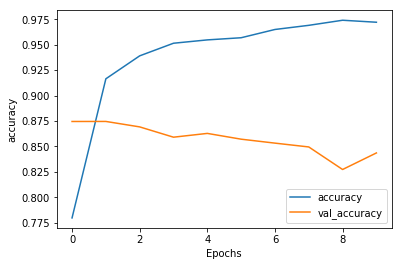

In [12]:
plot_graphs(history, 'accuracy')

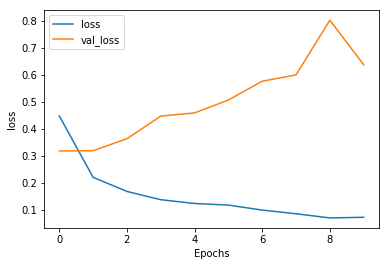

In [13]:
plot_graphs(history, 'loss')